GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


AttributeError: 'dict' object has no attribute 'figure'

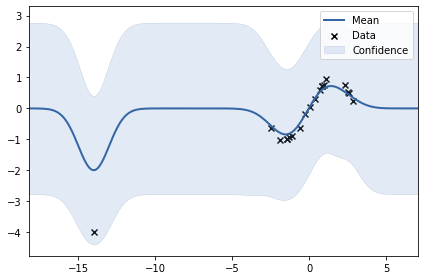

In [10]:
import GPy
GPy.plotting.change_plotting_library('matplotlib')
import numpy as np
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05
X[1] = -14
Y[1] = -4

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)

from IPython.display import display
display(m)

fig = m.plot()
GPy.plotting.show(fig, filename='GPy_test')

m.optimize(messages=True)

m.optimize_restarts(num_restarts = 10)

display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')


m.optimize_restarts(num_restarts = 10)
display(m)
fig = m.plot(plot_density=True)
GPy.plotting.show(fig, filename='basic_gp_regression_density_notebook_optimized')

 c:\users\cbaker1\venv\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


AttributeError: 'dict' object has no attribute 'figure'

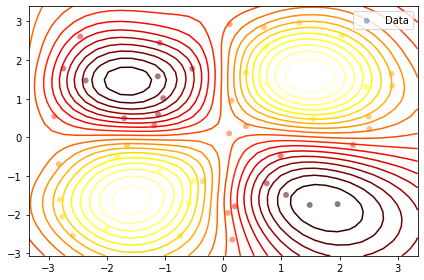

In [8]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1,
                        shared_xaxes=True,
                        subplot_titles=('slice at -1',
                                        'slice at 0',
                                        'slice at 1.5',
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')
